# 1. Load Data

In [1]:
import os
import numpy as np
import cv2
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd

# 2. Load Dataset

In [2]:
with h5py.File("dataset.h5", "r") as hf:
    x_train = hf["train_images"][:]
    y_train = hf["train_labels"][:]
    x_val = hf["val_images"][:]
    y_val = hf["val_labels"][:]
    x_test = hf["test_images"][:]
    y_test = hf["test_labels"][:]
    print("Dataset loaded successfully!")

Dataset loaded successfully!


# 3. Evaluasi Model

In [3]:
# Cari semua file .h5 model di folder ini (kecuali dataset.h5)
model_files = [f for f in os.listdir() if f.endswith('.h5') and f != 'dataset.h5']

eval_results = {}

for file in model_files:
    model = load_model(file)
    name = file.replace('.h5', '')
    
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    
    eval_results[name] = [precision, recall, f1]

# Simpan ke CSV
df_eval = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Precision', 'Recall', 'F1-Score'])
df_eval.to_csv("evaluasi_semua_model.csv")

15/15 [==============================] - 148s 10s/step

Model: ResNet101_aug_bs16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        53
           6       0.11      1.00      0.20        51
           7       0.00      0.00      0.00        58

    accuracy                           0.11       452
   macro avg       0.01      0.12      0.03       452
weighted avg       0.01      0.11      0.02       452



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

15/15 [==============================] - 192s 12s/step

Model: ResNet101_aug_bs32
              precision    recall  f1-score   support

           0       0.23      0.32      0.27        59
           1       0.30      0.05      0.09        59
           2       0.25      0.02      0.03        61
           3       0.65      0.50      0.57        60
           4       0.31      0.16      0.21        51
           5       0.32      0.43      0.37        53
           6       0.15      0.25      0.19        51
           7       0.22      0.48      0.30        58

    accuracy                           0.28       452
   macro avg       0.30      0.28      0.25       452
weighted avg       0.31      0.28      0.25       452



ValueError: Unrecognized keyword arguments: ['batch_shape']

In [4]:
# Cari semua file .h5 model di folder ini (kecuali dataset.h5)
model_files = [f for f in os.listdir() if f.endswith('.h5') and f != 'dataset.h5']

eval_results = {}

for file in model_files:
    model = load_model(file, compile=False)
    name = file.replace('.h5', '')
    
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    
    eval_results[name] = [precision, recall, f1]

# Simpan ke CSV
df_eval = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Precision', 'Recall', 'F1-Score'])
df_eval.to_csv("evaluasi_semua_model.csv")

15/15 [==============================] - 154s 10s/step

Model: ResNet101_aug_bs16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        53
           6       0.11      1.00      0.20        51
           7       0.00      0.00      0.00        58

    accuracy                           0.11       452
   macro avg       0.01      0.12      0.03       452
weighted avg       0.01      0.11      0.02       452



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

15/15 [==============================] - 169s 11s/step

Model: ResNet101_aug_bs32
              precision    recall  f1-score   support

           0       0.23      0.32      0.27        59
           1       0.30      0.05      0.09        59
           2       0.25      0.02      0.03        61
           3       0.65      0.50      0.57        60
           4       0.31      0.16      0.21        51
           5       0.32      0.43      0.37        53
           6       0.15      0.25      0.19        51
           7       0.22      0.48      0.30        58

    accuracy                           0.28       452
   macro avg       0.30      0.28      0.25       452
weighted avg       0.31      0.28      0.25       452



ValueError: Unrecognized keyword arguments: ['batch_shape']

In [5]:
# Ambil semua file .h5 kecuali dataset
model_files = [f for f in os.listdir() if f.endswith('.h5') and f != 'dataset.h5']

# Loop untuk tiap file dan cetak informasi versi
for file in model_files:
    try:
        with h5py.File(file, "r") as f:
            keras_ver = f.attrs.get('keras_version', b'unknown').decode('utf-8')
            backend = f.attrs.get('backend', b'unknown').decode('utf-8')
            print(f"{file} → Keras version: {keras_ver}, Backend: {backend}")
    except Exception as e:
        print(f"{file} → GAGAL dibaca: {e}")

ResNet101_aug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet101_aug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet101_noaug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet101_noaug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet152_aug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet152_aug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet152_noaug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet152_noaug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet50_aug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet50_aug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet50_noaug_bs16.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'
ResNet50_noaug_bs32.h5 → GAGAL dibaca: 'str' object has no attribute 'decode'


In [6]:
import h5py
import os

# Ambil semua file .h5 kecuali dataset
model_files = [f for f in os.listdir() if f.endswith('.h5') and f != 'dataset.h5']

# Loop untuk tiap file dan cetak informasi versi
for file in model_files:
    try:
        with h5py.File(file, "r") as f:
            keras_ver = f.attrs.get('keras_version', 'unknown')
            backend = f.attrs.get('backend', 'unknown')
            print(f"{file} → Keras version: {keras_ver}, Backend: {backend}")
    except Exception as e:
        print(f"{file} → GAGAL dibaca: {e}")

ResNet101_aug_bs16.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet101_aug_bs32.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet101_noaug_bs16.h5 → Keras version: 3.10.0, Backend: tensorflow
ResNet101_noaug_bs32.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet152_aug_bs16.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet152_aug_bs32.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet152_noaug_bs16.h5 → Keras version: 3.10.0, Backend: tensorflow
ResNet152_noaug_bs32.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet50_aug_bs16.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet50_aug_bs32.h5 → Keras version: 2.11.0, Backend: tensorflow
ResNet50_noaug_bs16.h5 → Keras version: 3.10.0, Backend: tensorflow
ResNet50_noaug_bs32.h5 → Keras version: 3.10.0, Backend: tensorflow


In [3]:
model_files = [
    "ResNet101_aug_bs16.h5", "ResNet101_aug_bs32.h5",
    "ResNet101_noaug_bs32.h5", "ResNet152_aug_bs16.h5",
    "ResNet152_aug_bs32.h5", "ResNet152_noaug_bs32.h5",
    "ResNet50_aug_bs16.h5", "ResNet50_aug_bs32.h5"
]

In [4]:
# Evaluasi Model untuk file .h5 Keras Version 2.11.0
eval_results = {}

for file in model_files:
    model = load_model(file, compile=False)
    name = file.replace('.h5', '')
    
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    
    eval_results[name] = [precision, recall, f1]

# Simpan ke CSV
df_eval = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Precision', 'Recall', 'F1-Score'])
df_eval.to_csv("evaluasi_model_keras2.csv")

15/15 [==============================] - 139s 9s/step

Model: ResNet101_aug_bs16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        53
           6       0.11      1.00      0.20        51
           7       0.00      0.00      0.00        58

    accuracy                           0.11       452
   macro avg       0.01      0.12      0.03       452
weighted avg       0.01      0.11      0.02       452



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

15/15 [==============================] - 138s 9s/step

Model: ResNet101_aug_bs32
              precision    recall  f1-score   support

           0       0.23      0.32      0.27        59
           1       0.30      0.05      0.09        59
           2       0.25      0.02      0.03        61
           3       0.65      0.50      0.57        60
           4       0.31      0.16      0.21        51
           5       0.32      0.43      0.37        53
           6       0.15      0.25      0.19        51
           7       0.22      0.48      0.30        58

    accuracy                           0.28       452
   macro avg       0.30      0.28      0.25       452
weighted avg       0.31      0.28      0.25       452

15/15 [==============================] - 139s 9s/step


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an


Model: ResNet101_noaug_bs32
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        59
           2       0.17      0.11      0.14        61
           3       0.15      0.85      0.25        60
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        51
           7       0.10      0.10      0.10        58

    accuracy                           0.14       452
   macro avg       0.05      0.13      0.06       452
weighted avg       0.06      0.14      0.06       452

15/15 [==============================] - 199s 13s/step

Model: ResNet152_aug_bs16
              precision    recall  f1-score   support

           0       0.19      0.12      0.15        59
           1       0.00      0.00      0.00        59
           2       0.22      0.59      0.32        61
           3       0.

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

15/15 [==============================] - 204s 13s/step

Model: ResNet152_aug_bs32
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.18      0.19      0.18        59
           2       0.19      0.57      0.28        61
           3       0.33      0.78      0.47        60
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        53
           6       0.40      0.04      0.07        51
           7       0.25      0.22      0.24        58

    accuracy                           0.24       452
   macro avg       0.17      0.23      0.15       452
weighted avg       0.17      0.24      0.16       452



c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

15/15 [==============================] - 205s 13s/step


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an


Model: ResNet152_noaug_bs32
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        59
           1       0.19      0.27      0.22        59
           2       0.41      0.57      0.48        61
           3       0.16      0.28      0.20        60
           4       0.00      0.00      0.00        51
           5       0.20      0.23      0.21        53
           6       0.95      0.73      0.82        51
           7       0.17      0.21      0.18        58

    accuracy                           0.29       452
   macro avg       0.30      0.29      0.27       452
weighted avg       0.30      0.29      0.27       452

15/15 [==============================] - 74s 5s/step

Model: ResNet50_aug_bs16
              precision    recall  f1-score   support

           0       0.25      0.02      0.03        59
           1       0.26      0.10      0.15        59
           2       0.35      0.77      0.48        61
           3       0.57 

c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision an

In [ ]:
# Evaluasi Model untuk file .h5 Keras Version 3.10.0 di device berbeda
model_files = [
    "ResNet101_noaug_bs16.h5",
    "ResNet152_noaug_bs16.h5",
    "ResNet50_noaug_bs16.h5",
    "ResNet50_noaug_bs32.h5"
]

eval_results = {}

for file in model_files:
    model = load_model(file, compile=False)
    name = file.replace('.h5', '')

    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))

    eval_results[name] = [precision, recall, f1]

df_eval = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Precision', 'Recall', 'F1-Score'])
df_eval.to_csv("evaluasi_model_keras3.csv")

# 4. Hasil Evaluasi Model

In [3]:
# Baca kedua file
df1 = pd.read_csv("evaluasi_model_keras2.csv", index_col=0)
df2 = pd.read_csv("evaluasi_model_keras3.csv", index_col=0)

# Gabungkan dan reset index agar model jadi kolom biasa
df_combined_eval = pd.concat([df1, df2]).reset_index()

# Ubah nama kolom index menjadi 'Model'
df_combined_eval.rename(columns={'index': 'Model Ke-'}, inplace=True)

# Simpan ke CSV baru
df_combined_eval.to_csv("evaluasi_model_semua.csv")

# Tampilkan jika ingin cek
df_combined_eval

,Model Ke-,Precision,Recall,F1-Score
0,ResNet101_aug_bs16,0.014104,0.125000,0.025348
1,ResNet101_aug_bs32,0.304316,0.277220,0.252841
2,ResNet101_noaug_bs32,0.051851,0.133525,0.060859
3,ResNet152_aug_bs16,0.122593,0.192146,0.123075
4,ResNet152_aug_bs32,0.168688,0.225862,0.154752
5,ResNet152_noaug_bs32,0.300129,0.288005,0.269107
6,ResNet50_aug_bs16,0.362821,0.422426,0.352274
7,ResNet50_aug_bs32,0.293828,0.369395,0.286135
8,ResNet101_noaug_bs16,0.170734,0.195445,0.109160
9,ResNet152_noaug_bs16,0.057728,0.164060,0.081582


In [4]:
# Baca file hasil gabungan
df_eval_all_model = pd.read_csv("evaluasi_model_semua.csv", index_col=0)

# Pisahkan kolom 'Model' menjadi tiga kolom baru
df_eval_all_model[['Layer ResNet', 'Data', 'batch_size']] = df_eval_all_model['Model Ke-'].str.split('_', expand=True)

df_eval_all_model = df_eval_all_model[['Model Ke-', 'Layer ResNet', 'Data', 'batch_size', 'Precision', 'Recall', 'F1-Score']]

df_eval_all_model['Data'] = df_eval_all_model['Data'].replace({
    'aug': 'Augmentasi',
    'noaug': 'Tanpa Augmentasi'
})

df_eval_all_model['Layer ResNet'] = df_eval_all_model['Layer ResNet'].replace({
    'ResNet50': '50',
    'ResNet101': '101',
    'ResNet152': '152'
})

df_eval_all_model['batch_size'] = df_eval_all_model['batch_size'].replace({
    'bs16': '16',
    'bs32': '32'
})

df_eval_all_model['Layer ResNet'] = df_eval_all_model['Layer ResNet'].astype(int)
df_eval_all_model['batch_size'] = df_eval_all_model['batch_size'].astype(int)

In [5]:
# Mapping agar Tanpa Augmentasi muncul sebelum Augmentasi
df_eval_all_model['Data'] = pd.Categorical(
    df_eval_all_model['Data'],
    categories=["Tanpa Augmentasi", "Augmentasi"],
    ordered=True
)

# Sort: Data (Tanpa → Augmentasi), ResNet, lalu batch_size
df_eval_all_model = df_eval_all_model.sort_values(
    by=['Data', 'Layer ResNet', 'batch_size']
).reset_index(drop=True)

# Ulangi penomoran model sesuai urutan baru
df_eval_all_model['Model Ke-'] = range(1, len(df_eval_all_model) + 1)
df_eval_all_model.set_index("Model Ke-", inplace=True)

# Simpan ke CSV jika perlu
df_eval_all_model.to_csv("evaluasi_semua_model_final.csv")

df_eval_all_model

,Layer ResNet,Data,batch_size,Precision,Recall,F1-Score
Model Ke-,,,,,,
1,50,Tanpa Augmentasi,16,0.116383,0.151157,0.057764
2,50,Tanpa Augmentasi,32,0.327312,0.338233,0.292626
3,101,Tanpa Augmentasi,16,0.170734,0.195445,0.109160
4,101,Tanpa Augmentasi,32,0.051851,0.133525,0.060859
5,152,Tanpa Augmentasi,16,0.057728,0.164060,0.081582
6,152,Tanpa Augmentasi,32,0.300129,0.288005,0.269107
7,50,Augmentasi,16,0.362821,0.422426,0.352274
8,50,Augmentasi,32,0.293828,0.369395,0.286135
9,101,Augmentasi,16,0.014104,0.125000,0.025348


# 5. Visualisasi Hasil Evaluasi Model

## 5.1. Perbandingan Kinerja per Arsitektur ResNet (50, 101, 152)

In [6]:
# Load data
df = pd.read_csv("evaluasi_semua_model_final.csv", index_col=0)


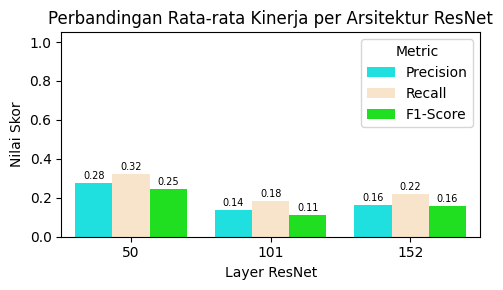

In [7]:
# Grouping dan mean
# Pastikan kolomnya benar (strip spasi jika perlu)
df.columns = df.columns.str.strip()

# Ambil mean tiap Layer ResNet
resnet_grouped = df.groupby("Layer ResNet")[["Precision", "Recall", "F1-Score"]].mean().reset_index()

# Reshape ke format long
resnet_melt = resnet_grouped.melt(id_vars="Layer ResNet", var_name="Metric", value_name="Score")

# Warna khusus untuk tiap metrik
custom_palette = {
    "Precision": mcolors.CSS4_COLORS["cyan"],  
    "Recall": mcolors.CSS4_COLORS["bisque"],   
    "F1-Score": mcolors.CSS4_COLORS["lime"]    
}

# Plot
# Ukuran figure kecil
plt.figure(figsize=(5, 3))
ax1 = sns.barplot(data=resnet_melt, x="Layer ResNet", y="Score", hue="Metric", palette=custom_palette)

# Tambahkan nilai di atas bar
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Untuk menghindari label 0.00 yang tidak terlihat
        ax1.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=7  # Ukuran teks kecil agar muat
        )
        
plt.title("Perbandingan Rata-rata Kinerja per Arsitektur ResNet")
plt.xlabel("Layer ResNet")
plt.ylabel("Nilai Skor")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

## 5.2. Pengaruh Augmentasi terhadap Kinerja

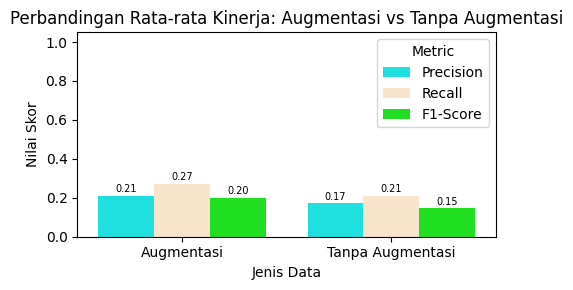

In [8]:
data_grouped = df.groupby("Data")[["Precision", "Recall", "F1-Score"]].mean().reset_index()
data_melt = data_grouped.melt(id_vars="Data", var_name="Metric", value_name="Score")

plt.figure(figsize=(5,3))
ax2 = sns.barplot(data=data_melt, x="Data", y="Score", hue="Metric", palette=custom_palette)

# Tambahkan nilai di atas bar
for p in ax2.patches:
    height = p.get_height()
    if height > 0:  # Untuk menghindari label 0.00 yang tidak terlihat
        ax2.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=7  # Ukuran teks kecil agar muat
        )

plt.title("Perbandingan Rata-rata Kinerja: Augmentasi vs Tanpa Augmentasi")
plt.xlabel("Jenis Data")
plt.ylabel("Nilai Skor")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

## 5.3. Pengaruh Batch Size terhadap Kinerja

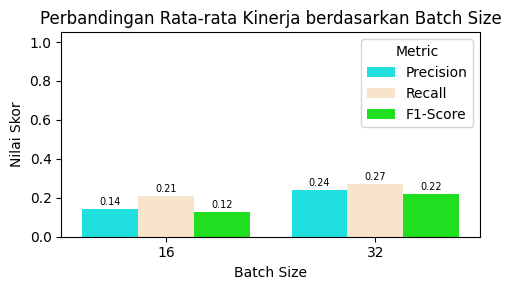

In [9]:
batch_grouped = df.groupby("batch_size")[["Precision", "Recall", "F1-Score"]].mean().reset_index()
batch_melt = batch_grouped.melt(id_vars="batch_size", var_name="Metric", value_name="Score")

plt.figure(figsize=(5,3))
ax3 = sns.barplot(data=batch_melt, x="batch_size", y="Score", hue="Metric", palette=custom_palette)

# Tambahkan nilai di atas bar
for p in ax3.patches:
    height = p.get_height()
    if height > 0:  # Untuk menghindari label 0.00 yang tidak terlihat
        ax3.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=7  # Ukuran teks kecil agar muat
        )

plt.title("Perbandingan Rata-rata Kinerja berdasarkan Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Nilai Skor")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

## 5.4. Visualisasi Semua Model

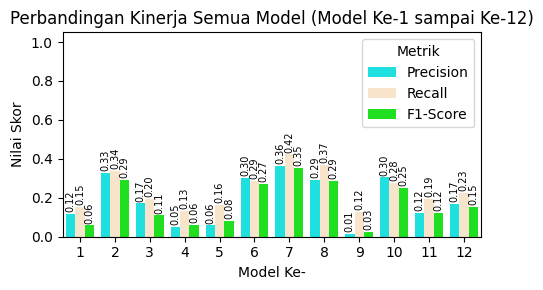

In [10]:
df_long = df.reset_index().melt(id_vars=["Model Ke-"], 
                                value_vars=["Precision", "Recall", "F1-Score"],
                                var_name="Metric", value_name="Score")

plt.figure(figsize=(5,3))
ax4 = sns.barplot(data=df_long, x="Model Ke-", y="Score", hue="Metric", palette=custom_palette)

# Tambahkan nilai di atas bar
for p in ax4.patches:
    height = p.get_height()
    if height > 0:  # Untuk menghindari label 0.00 yang tidak terlihat
        ax4.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=7,  # Ukuran teks kecil agar muat
            rotation=90
        )

plt.title("Perbandingan Kinerja Semua Model (Model Ke-1 sampai Ke-12)")
plt.xlabel("Model Ke-")
plt.ylabel("Nilai Skor")
plt.ylim(0, 1.05)
plt.legend(title="Metrik")
plt.tight_layout()
plt.show()

## 5.5. Dashboard Visualisasi Hasil Evaluasi Model

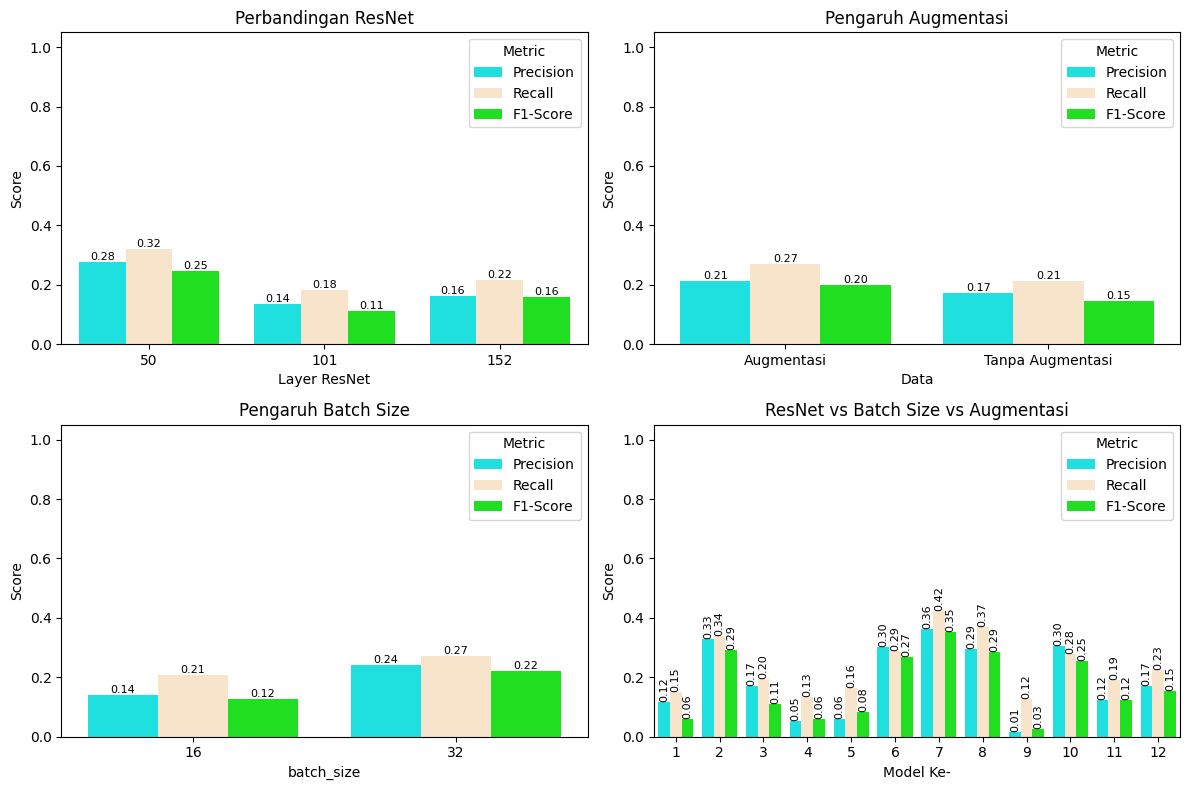

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 baris, 2 kolom

# --- Plot 1: Perbandingan ResNet ---
ax = axes[0, 0]
sns.barplot(data=resnet_melt, x="Layer ResNet", y="Score", hue="Metric", ax=ax, palette=custom_palette)
ax.set_title("Perbandingan ResNet")
ax.set_ylim(0, 1.05)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=8)

# --- Plot 2: Pengaruh Augmentasi ---
ax = axes[0, 1]
sns.barplot(data=data_melt, x="Data", y="Score", hue="Metric", ax=ax, palette=custom_palette)
ax.set_title("Pengaruh Augmentasi")
ax.set_ylim(0, 1.05)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=8)

# --- Plot 3: Pengaruh Batch Size ---
ax = axes[1, 0]
sns.barplot(data=batch_melt, x="batch_size", y="Score", hue="Metric", ax=ax, palette=custom_palette)
ax.set_title("Pengaruh Batch Size")
ax.set_ylim(0, 1.05)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=8)

# --- Plot 4: Kombinasi Batch Size vs Augmentasi ---
ax = axes[1, 1]
sns.barplot(data=df_long, x="Model Ke-", y="Score", hue="Metric", ax=ax, palette=custom_palette)
ax.set_title("ResNet vs Batch Size vs Augmentasi")
ax.set_ylim(0, 1.05)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# 6. Kesimpulan

In [12]:
# 1. Best Model berdasarkan F1-Score tertinggi
best_model = df[df['F1-Score'] == df['F1-Score'].max()].iloc[0]
model_index = df[df['F1-Score'] == df['F1-Score'].max()].index[0]  # index = Model Ke-

print("1. ✅ Best Model berdasarkan F1-Score tertinggi:")
print(f"   - Model Ke-     : {model_index}")
print(f"   - Layer ResNet  : {best_model['Layer ResNet']}")
print(f"   - Data          : {best_model['Data']}")
print(f"   - Batch Size    : {best_model['batch_size']}")
print(f"   - Precision     : {best_model['Precision']:.4f}")
print(f"   - Recall        : {best_model['Recall']:.4f}")
print(f"   - F1-Score      : {best_model['F1-Score']:.4f}")
print()

# 2. Best ResNet berdasarkan F1-Score rata-rata tertinggi
resnet_group = df.groupby('Layer ResNet')[['Precision', 'Recall', 'F1-Score']].mean()
best_resnet = resnet_group['F1-Score'].idxmax()

print("2. ✅ Best ResNet berdasarkan rata-rata F1-Score tertinggi:")
print(f"   - Layer ResNet  : {best_resnet}")
print("   - Rata-rata Metrik:")
print(resnet_group.loc[best_resnet].to_string())
print()

# 3. Best Data berdasarkan F1-Score rata-rata tertinggi
data_group = df.groupby('Data')[['Precision', 'Recall', 'F1-Score']].mean()
best_data = data_group['F1-Score'].idxmax()

print("3. ✅ Best Data berdasarkan rata-rata F1-Score tertinggi:")
print(f"   - Data          : {best_data}")
print("   - Rata-rata Metrik:")
print(data_group.loc[best_data].to_string())
print()

# 4. Best Batch Size berdasarkan F1-Score rata-rata tertinggi
bs_group = df.groupby('batch_size')[['Precision', 'Recall', 'F1-Score']].mean()
best_bs = bs_group['F1-Score'].idxmax()

print("4. ✅ Best Batch Size berdasarkan rata-rata F1-Score tertinggi:")
print(f"   - Batch Size    : {best_bs}")
print("   - Rata-rata Metrik:")
print(bs_group.loc[best_bs].to_string())
print()

1. ✅ Best Model berdasarkan F1-Score tertinggi:
   - Model Ke-     : 7
   - Layer ResNet  : 50
   - Data          : Augmentasi
   - Batch Size    : 16
   - Precision     : 0.3628
   - Recall        : 0.4224
   - F1-Score      : 0.3523

2. ✅ Best ResNet berdasarkan rata-rata F1-Score tertinggi:
   - Layer ResNet  : 50
   - Rata-rata Metrik:
Precision    0.275086
Recall       0.320303
F1-Score     0.247200

3. ✅ Best Data berdasarkan rata-rata F1-Score tertinggi:
   - Data          : Augmentasi
   - Rata-rata Metrik:
Precision    0.211059
Recall       0.268675
F1-Score     0.199071

4. ✅ Best Batch Size berdasarkan rata-rata F1-Score tertinggi:
   - Batch Size    : 32
   - Rata-rata Metrik:
Precision    0.241021
Recall       0.272040
F1-Score     0.219387

